In [286]:
import pandas as pf
import tensorflow as tf
gpus =tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import os

#### Load Data into a dataset using tf.keras api

In [287]:
path = os.path.join('data','seg_train\seg_train')
data = tf.keras.utils.image_dataset_from_directory(path)
test_path =os.path.join('data','seg_test\seg_test')
test_data = tf.keras.utils.image_dataset_from_directory(test_path)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [288]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [289]:
batch

(array([[[[1.40000000e+02, 1.48000000e+02, 1.69000000e+02],
          [1.40378906e+02, 1.49515625e+02, 1.70136719e+02],
          [1.40964844e+02, 1.51859375e+02, 1.71894531e+02],
          ...,
          [1.32000000e+02, 1.45000000e+02, 1.62000000e+02],
          [1.32000000e+02, 1.45000000e+02, 1.62000000e+02],
          [1.32000000e+02, 1.45000000e+02, 1.62000000e+02]],
 
         [[1.41515625e+02, 1.49515625e+02, 1.69757812e+02],
          [1.41033112e+02, 1.50169830e+02, 1.70033112e+02],
          [1.40286957e+02, 1.51181488e+02, 1.70458832e+02],
          ...,
          [1.32365585e+02, 1.45365585e+02, 1.62365585e+02],
          [1.32143570e+02, 1.45143570e+02, 1.62143570e+02],
          [1.32000000e+02, 1.45000000e+02, 1.62000000e+02]],
 
         [[1.43859375e+02, 1.51859375e+02, 1.70929688e+02],
          [1.42044769e+02, 1.51181488e+02, 1.69872894e+02],
          [1.39238678e+02, 1.50133209e+02, 1.68238678e+02],
          ...,
          [1.32930923e+02, 1.45930923e+02, 1.6293

#### Preprocess data
We will split the _train_data_ into properly the training data and the validation data, _test_data_ will continue the same

In [290]:
#Scale
data = data.map(lambda x,y: (x/255,y))
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [291]:
test_data = test_data.map(lambda x,y: (x/255,y))

In [292]:
len(batch)

2

In [293]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.3)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

In [294]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
batch

(array([[[[0.00000000e+00, 0.00000000e+00, 1.56862754e-02],
          [0.00000000e+00, 0.00000000e+00, 1.56862754e-02],
          [0.00000000e+00, 0.00000000e+00, 1.56862754e-02],
          ...,
          [0.00000000e+00, 0.00000000e+00, 7.84313772e-03],
          [0.00000000e+00, 0.00000000e+00, 7.84313772e-03],
          [0.00000000e+00, 0.00000000e+00, 7.84313772e-03]],
 
         [[0.00000000e+00, 0.00000000e+00, 1.27144605e-02],
          [0.00000000e+00, 0.00000000e+00, 1.27144605e-02],
          [0.00000000e+00, 0.00000000e+00, 1.27144605e-02],
          ...,
          [0.00000000e+00, 1.48590689e-03, 4.87132370e-03],
          [0.00000000e+00, 1.48590689e-03, 4.87132370e-03],
          [0.00000000e+00, 1.48590689e-03, 4.87132370e-03]],
 
         [[0.00000000e+00, 0.00000000e+00, 8.11887253e-03],
          [0.00000000e+00, 0.00000000e+00, 8.11887253e-03],
          [0.00000000e+00, 0.00000000e+00, 8.11887253e-03],
          ...,
          [0.00000000e+00, 3.78370099e-03, 2.7573

##### Visualize data

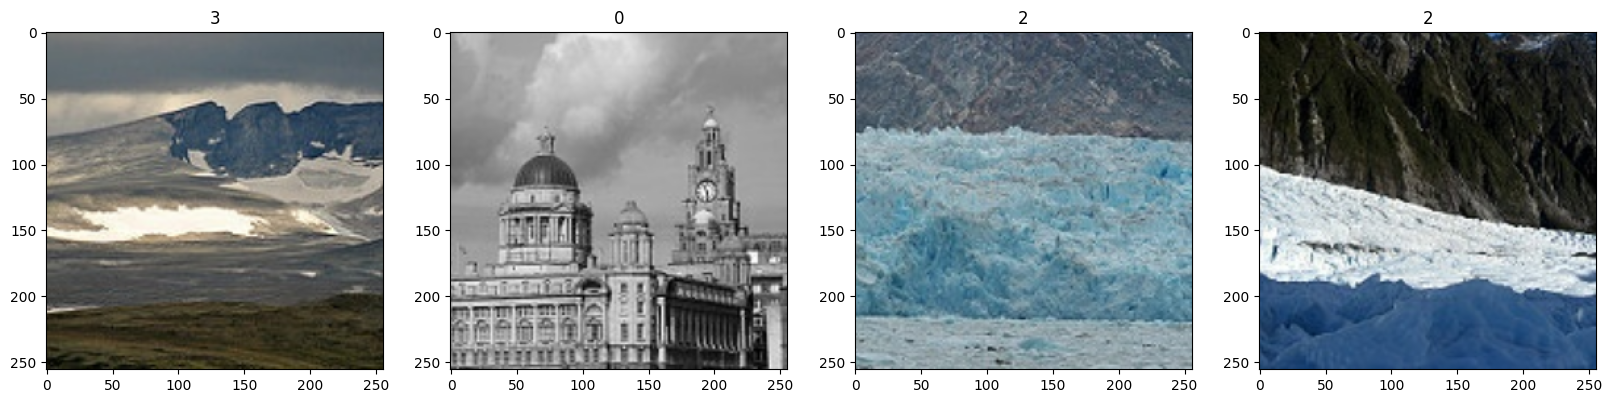

In [295]:
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

#### Build the NN and train the model

In [296]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [297]:
model=Sequential()

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(6,activation='sigmoid'))

model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [298]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 30, 30, 16)      

In [299]:
logdirectory ='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdirectory)

In [300]:
epochs = 100
hist = model.fit(train,epochs=epochs,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/100
307/307 [==============================] - 20s 63ms/step - loss: 1.0819 - accuracy: 0.5832 - val_loss: 0.8866 - val_accuracy: 0.6756
Epoch 2/100
307/307 [==============================] - 17s 57ms/step - loss: 0.7580 - accuracy: 0.7165 - val_loss: 0.7272 - val_accuracy: 0.7328
Epoch 3/100
307/307 [==============================] - 18s 57ms/step - loss: 0.6035 - accuracy: 0.7785 - val_loss: 0.6363 - val_accuracy: 0.7729
Epoch 4/100
307/307 [==============================] - 17s 54ms/step - loss: 0.4437 - accuracy: 0.8386 - val_loss: 0.8114 - val_accuracy: 0.7252
Epoch 5/100
307/307 [==============================] - 17s 54ms/step - loss: 0.2766 - accuracy: 0.9016 - val_loss: 0.7645 - val_accuracy: 0.7762
Epoch 6/100
307/307 [==============================] - 16s 53ms/step - loss: 0.1908 - accuracy: 0.9370 - val_loss: 0.9025 - val_accuracy: 0.7541
Epoch 7/100
307/307 [==============================] - 16s 53ms/step - loss: 0.1375 - accuracy: 0.9525 - val_loss: 1.1684 - val_ac

#### Evaluating model

In [301]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [302]:
model.evaluate(test_data)

94/94 [==============================] - 2s 19ms/step - loss: 2.6937 - accuracy: 0.7517


[2.6937355995178223, 0.7516666650772095]

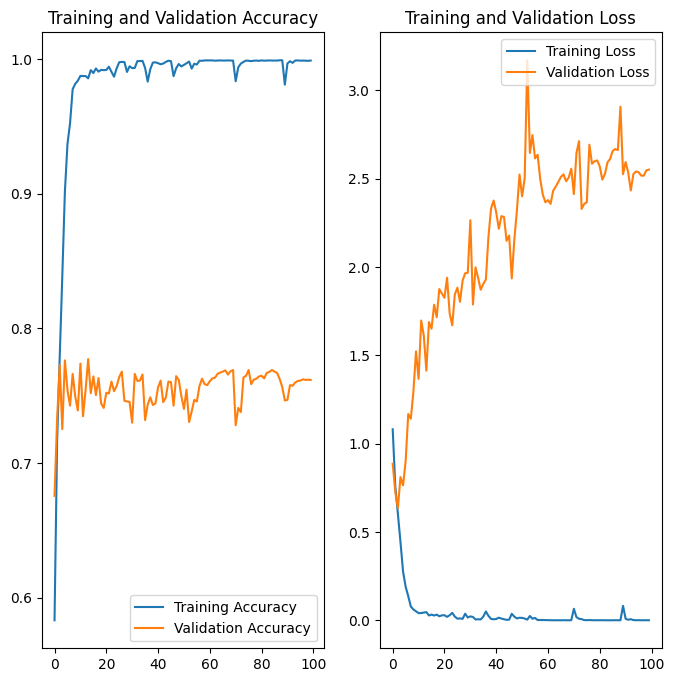

In [303]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [304]:
test_batch = test_data.as_numpy_iterator().next()
yhat = model.predict(test_batch[0])
yhat = yhat.argmax(axis=-1)
print(test_batch[1])
print(yhat)

1/1 [==============================] - 0s 87ms/step
[4 4 5 4 4 1 1 4 3 1 0 4 2 4 4 5 1 3 1 2 5 2 5 3 3 5 0 1 0 3 4 1]
[4 4 5 4 4 1 1 0 3 1 0 4 2 4 4 5 1 3 1 2 0 2 0 3 4 0 0 1 0 2 4 1]


In [305]:
class_names =['buildings','forest','glacier','mountain','sea','street']
true_class_names = [class_names[i] for i in test_batch[1]]
predicted_class_names = [class_names[i] for i in yhat]
print(true_class_names[:9])
print(predicted_class_names[:9])

['sea', 'sea', 'street', 'sea', 'sea', 'forest', 'forest', 'sea', 'mountain']
['sea', 'sea', 'street', 'sea', 'sea', 'forest', 'forest', 'buildings', 'mountain']


In [306]:
tf=[]
for i,element in enumerate(test_batch[1][:24]):
    if element == yhat[i]:
        tf.append(1)
    else:
        tf.append(0)
accuracy=sum(tf)/len(tf)


[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1] 21 24


In [307]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [308]:
for batch in test_data.as_numpy_iterator():
    X,Y=batch
    yhat = model.predict(X)
    yhat = yhat.argmax(axis=-1)
    pre.update_state(Y,yhat)
    re.update_state(Y,yhat)
    acc.update_state(Y,yhat)

1/1 [==============================] - 0s 72ms/step


In [309]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy (CategoricalAccuracy): {acc.result().numpy()}, Accuracy (by-hand method): {accuracy}')

Precision: 0.9551587104797363, Recall: 0.9391338229179382, Accuracy (CategoricalAccuracy): 0.5744680762290955, Accuracy (by-hand method): 0.875


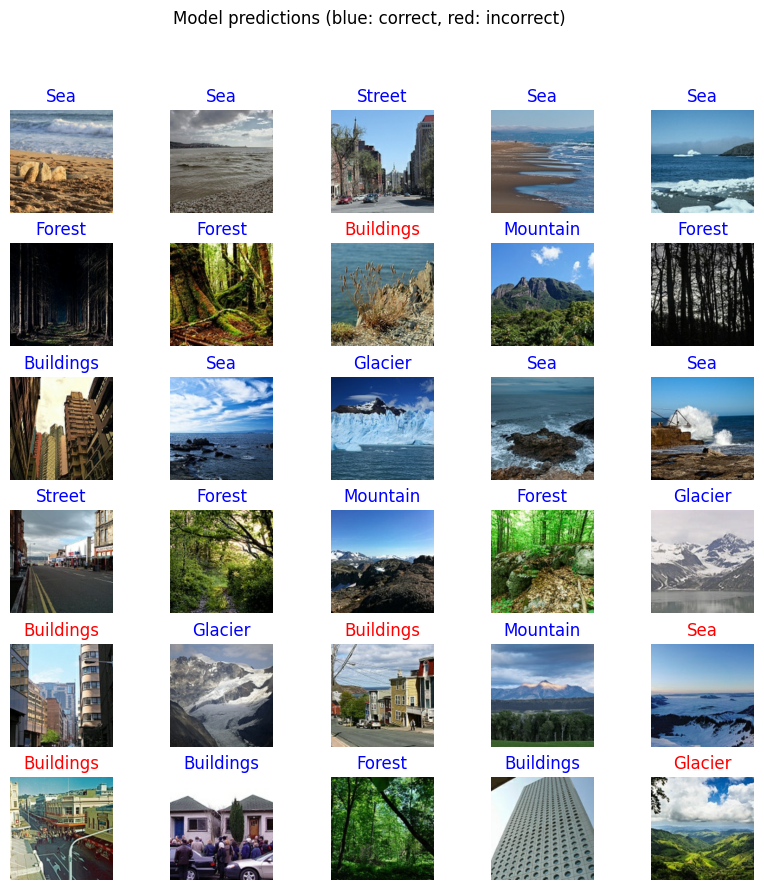

In [310]:
plt.figure(figsize=(10,10))
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(test_batch[0][n])
    color = "blue" if predicted_class_names[n] == true_class_names[n] else "red"
    plt.title(predicted_class_names[n].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

In [312]:
model.save('classification.h5')